## 군집 평가 – 실루엣 분석

군집화 예시 사이트 kmeans전용 사이트
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=silhouette

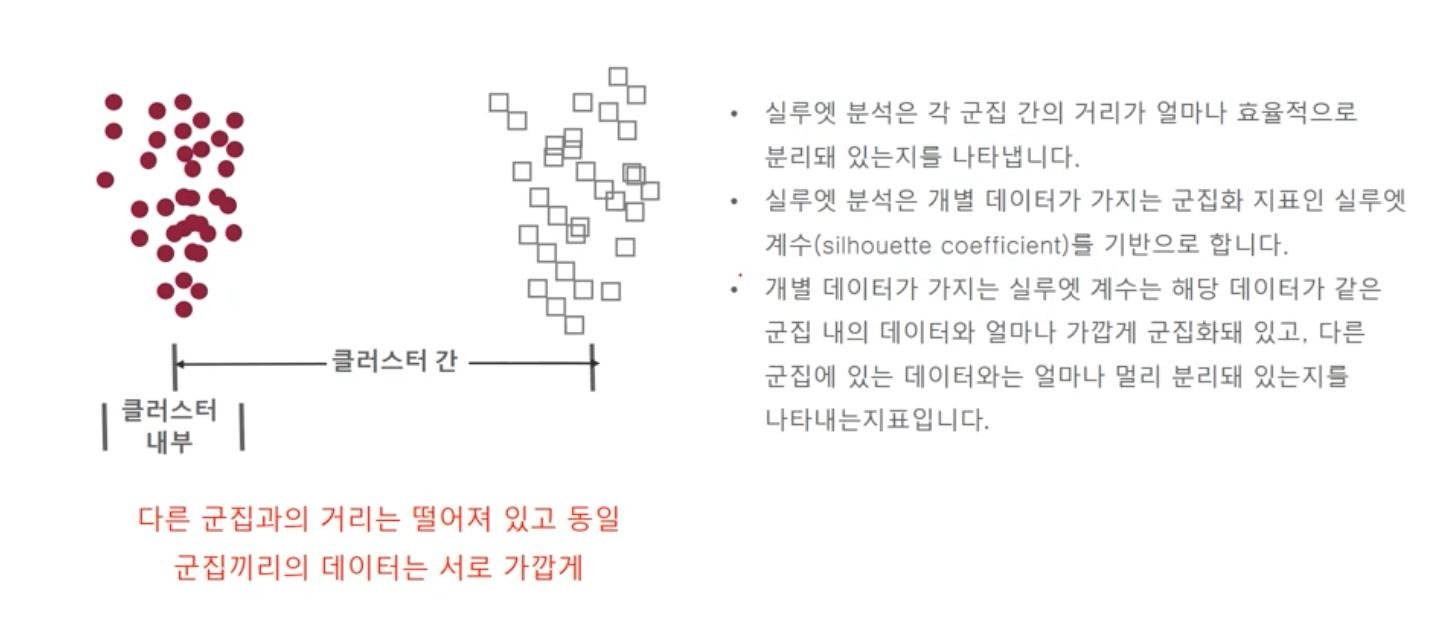

## 실루엣 계수는 1에 가까울수록 군집화가 잘 되었다는 뜻
- 0.5만 되도 나쁘지 않다

## 실루엣 계수가 –값이라는 것은 해당 데이터의 군집화가 잘못 되었다는 뜻
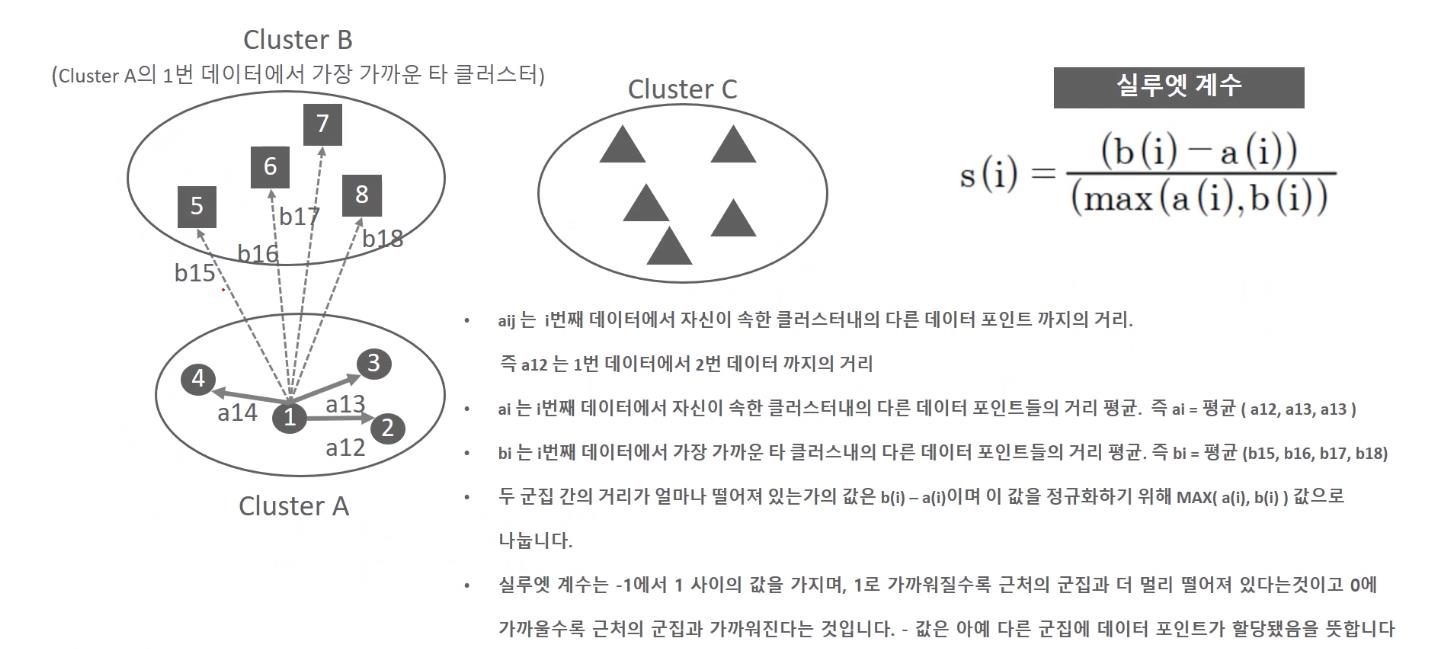


### 실루엣 계수 분석(그림으로표시) 후 군집1과 군집2 적절한 거리가 있지만,
### 군집2,군집3이 매우 가까우면 클러스팅은 잘못되었다고 봐야한다.

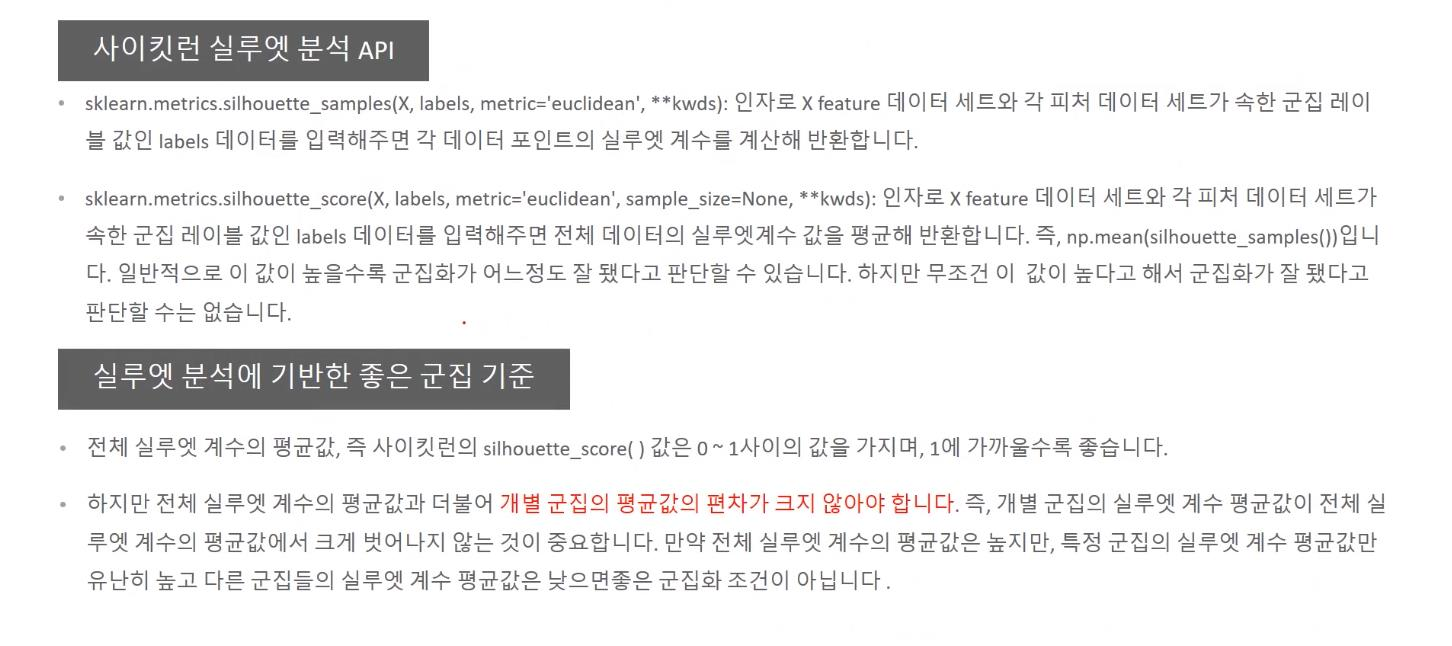

## 붓꽃 데이터에서 실루엣 계수 계산
## 1.kmeans 군집화 후 클러스터링 값 할당

In [ ]:
X

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris =load_iris()
irisDF =pd.DataFrame(data =iris.data, columns=['sepel_length','sepel_width','petal_lenth','petal_lenth'])

irisDF.info()


#Kmeans 군집화 수행
#클러스팅할 데이터 생성 (군집 3개,                            데이터 표준편차 0)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
# 생성한 Keams로 irisDF학습
kmeans.fit(irisDF)

#데이터당 클러스터링값 할당
irisDF['cluster']= kmeans.labels_

print(irisDF.shape)
irisDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepel_length  150 non-null    float64
 1   sepel_width   150 non-null    float64
 2   petal_lenth   150 non-null    float64
 3   petal_lenth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(150, 5)


,sepel_length,sepel_width,petal_lenth,petal_lenth,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## 2. 모든 개별 데이터에 실루엣 계수값을 구함( 한행에 하나의 실루엣 스코어 할당)

In [2]:
#실루엣 분석을 위한 라이브러리 호출
from sklearn.metrics import silhouette_samples, silhouette_score


score_samples = silhouette_samples(iris.data, irisDF['cluster']) 
print('silhouette_sample() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 컬럼 추가
irisDF['silhouette_coeff']= score_samples

#모든 데이터의 평균 실루엣 스코어를 계산함
average_scores = silhouette_score(iris.data, irisDF['cluster'])
print('iris dataset_silhouette_coeff_analysis_scores:{0:.3}'.format(average_scores)) 
# 각 클로스터들의 군집화의 전체 평균
# 1의 CLUSTER는 0.8로 아주 좋은 점수
# 0,2는 0.4점대로 1에 비해 낮다. 
# 그래도 실루엣 스코어가 0. 대에 있는 것은 아주 좋은 클러스터링(Kmeans)이다 
irisDF.head()

silhouette_sample() return 값의 shape (150,)
iris dataset_silhouette_coeff_analysis_scores:0.553


,sepel_length,sepel_width,petal_lenth,petal_lenth,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


### 결과

In [3]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 결과 : 데이터 별 실루엣 계수
>클러스터가 1인 데이터들은 0.8 정도의 실루엣 계수를 가지므로
군집화가 어느정도 잘 된 듯하다.
하지만 실루엣 계수 평균 값이 0.553인 이유는
다른 클러스터에 할당된 데이터들의 실루엣 계수값이 작아서이다.

## 실루엣 계수 시각화 통해 최적의 클러스터 수 찾기 !!매우 유용 !!

### 데이터들의 실루엣 계수를 계산해서 시각화 해주는 함수

In [4]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


## iris데이터를 위의 함수를 이용해 최적의 클러스터수를 찾아보자

### 클러스터 수 변화시키면서 random 데이터 실루엣 계수 분포 시각화

### ! 아이리스 데이터가 아닌 랜덤으로 뽑아낸 데이터이다. 단지 비교를 위한것 뿐

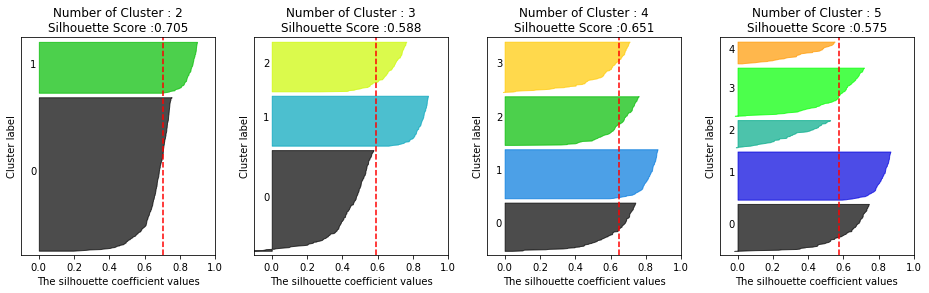

In [5]:
from sklearn.datasets import make_blobs
import warnings
# make_blobs을 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터셋 X,Y 생성
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                 center_box=(-10.0, 10.0),shuffle=True, random_state=1)

#cluster 개수를 2개 3개 4개 5개일 때 클로스터별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4,5],X)

In [ ]:
## 클러스터 수 변화시키면서 붓꽃 데이터 실루엣 계수 분포 시각화

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

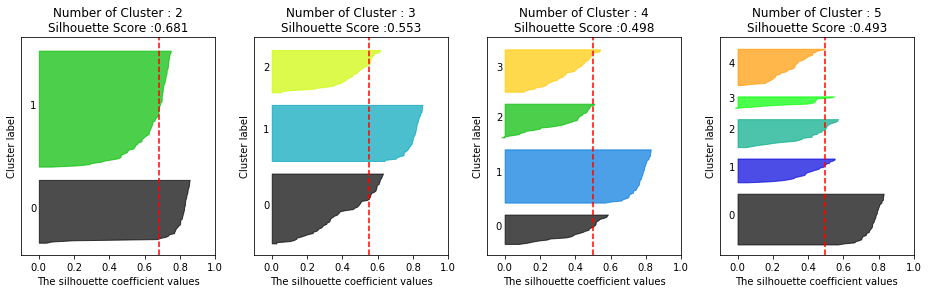

In [6]:
from sklearn.datasets import make_blobs
import warnings


#cluster 개수를 2개 3개 4개 5개일 때 클로스터별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4,5],iris.data)

## 결과 visualize_silhouette 함수를 통한 결과 도출
 - iris 데이터의 군집하는 2개의 군집화가 가장 높은 실루엣 계수 스코어다.

## !!라이브러리 몇개 정리한것 

### make_blobs¶
 - make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 
 - 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 
 - 다음 데이터 생성 코드의 결과를 보면 make_classification 함수로 만든 가상데이터와 모양이 다른 것을 확인 할 수 있다. 
 - make_blobs는 보통 클러스링 용 가상데이터를 생성하는데 사용한다. make_blobs 함수의 인수와 반환값은 다음과 같다.

#### 인수:

- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
- cluster_std: 클러스터의 표준 편차, 디폴트 1.0
- center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

#### 반환값:
 1. 독립 변수
- X : [n_samples, n_features] 크기의 배열
 2. 종속 변수
- y : [n_samples] 크기의 배열

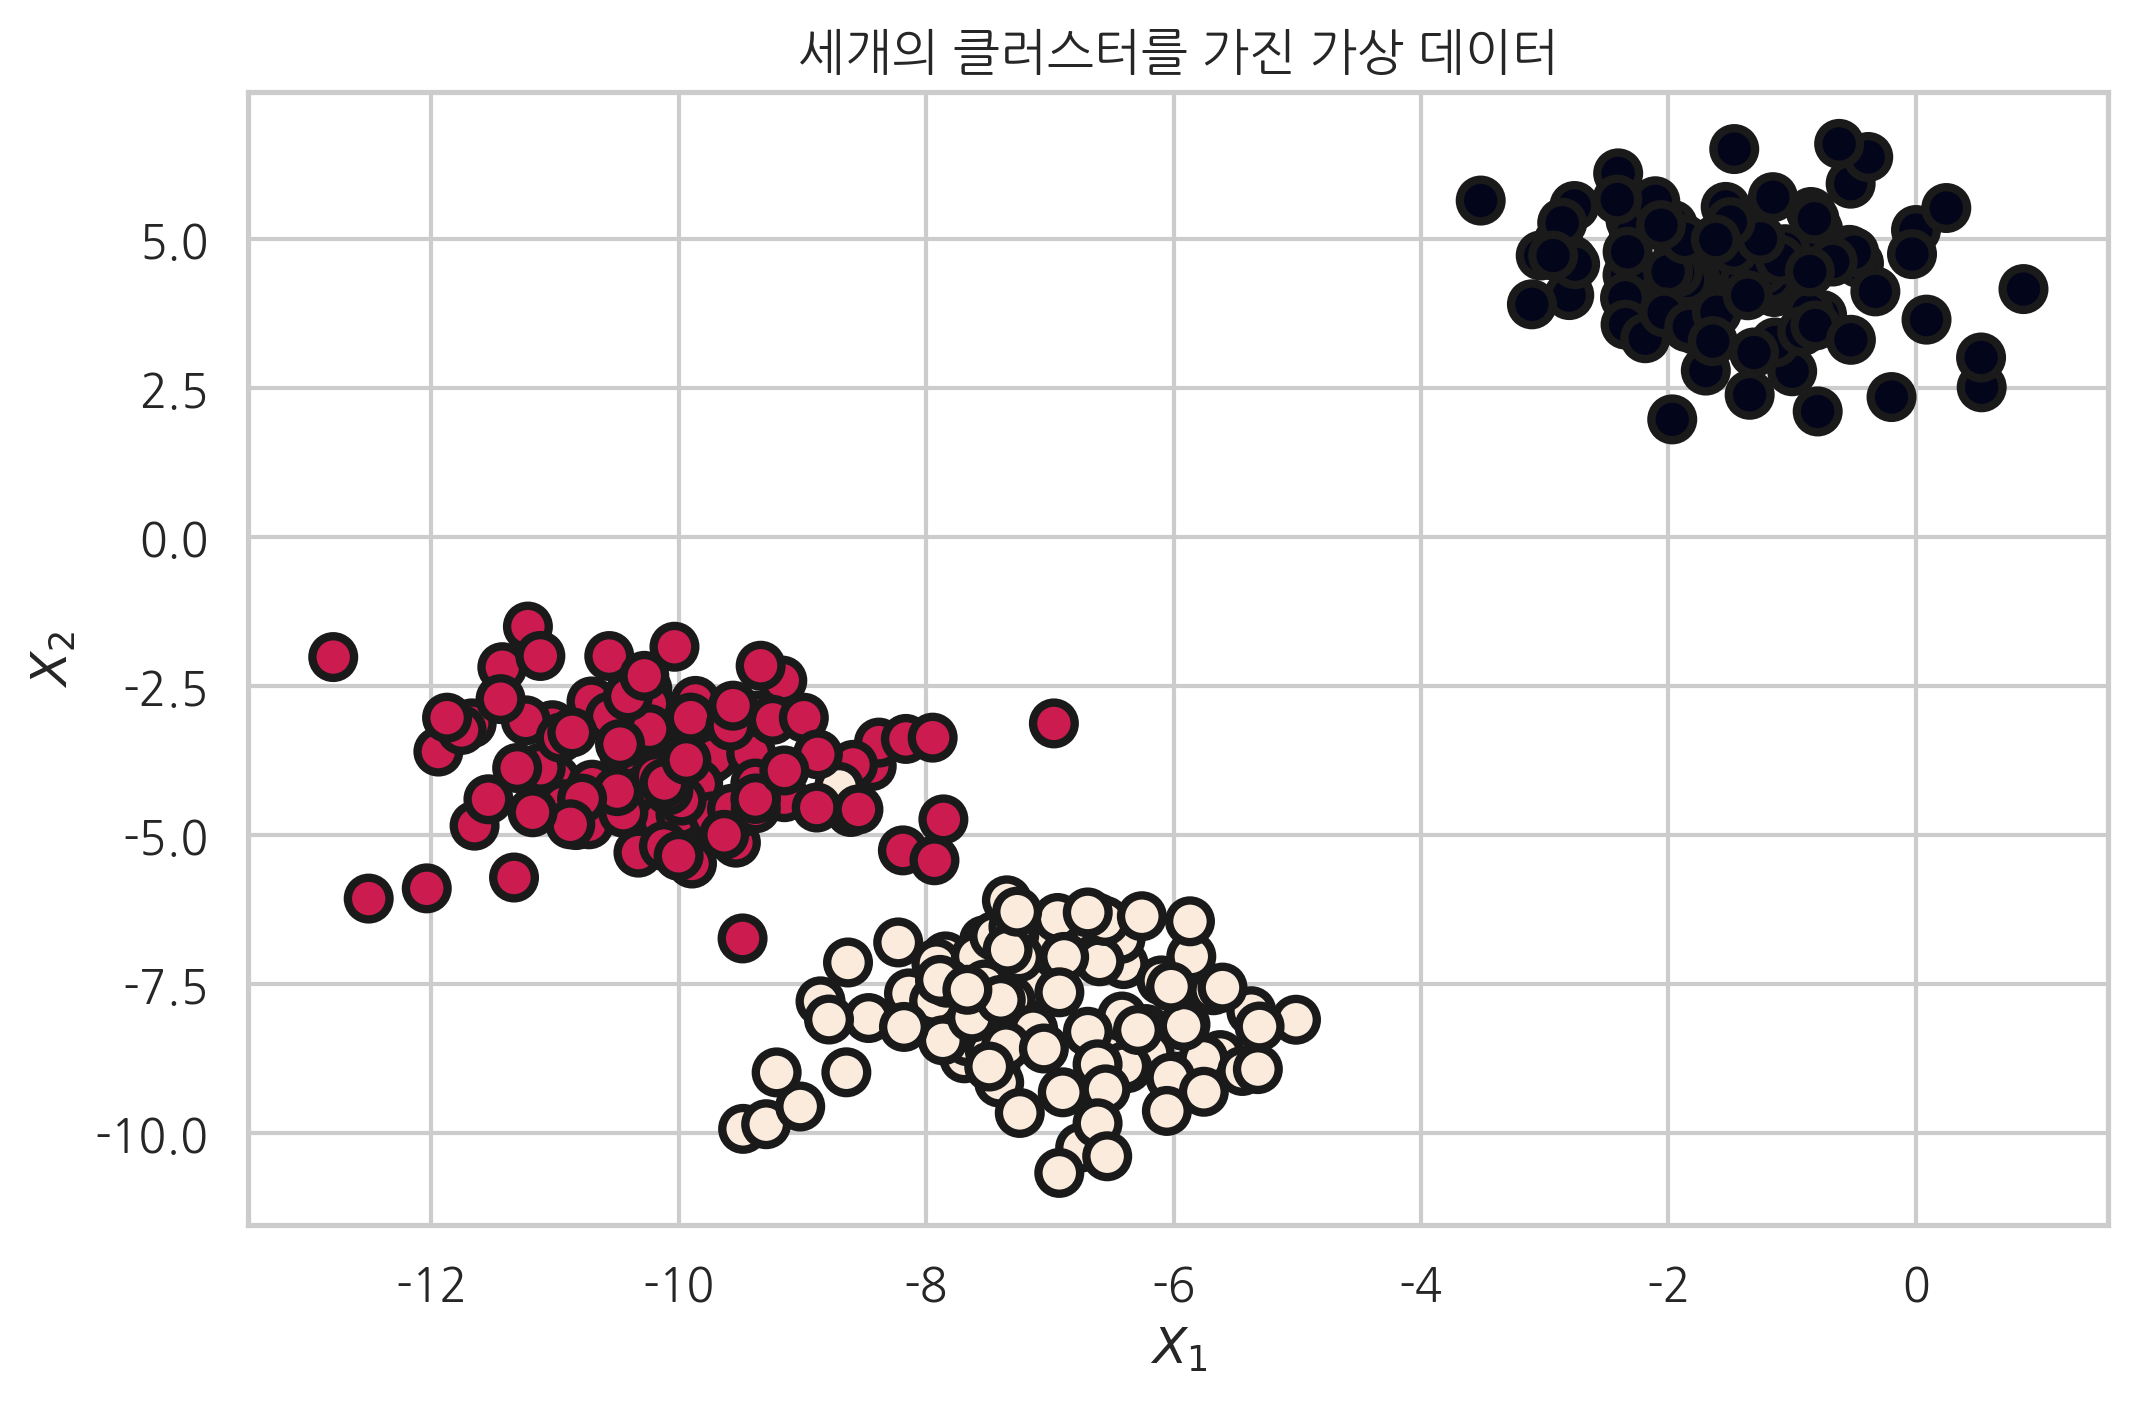

C:\Users\82105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\l

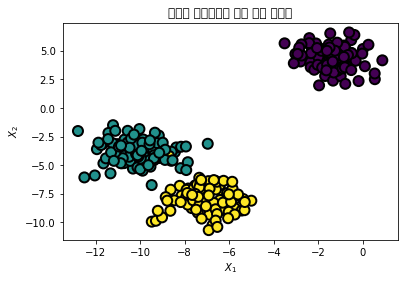

In [7]:
#위에 이미지 코드
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()